## Libraries and Definitions

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [40]:
sns.set(style="darkgrid", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.style.use("dark_background")

## Data Exploration

In [41]:
file_path = 'data/conversation_nps.csv'

Fix JSON and CSV filenames

In [42]:
import os
path = 'data/'
separator = '__'
items = [ name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [43]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    for filename in files:
        os.rename(path_to_items + filename, path_to_items + filename.replace('1_conversation_', '').split(separator,1)[0] + '.' + i)

Now we have all items with the same id pattern

In [44]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    #print(files)

In [45]:
df = pd.read_csv(file_path, header=None, usecols=[0,1], delimiter=';')
df = df.rename(columns={0: 'id', 1: 'rating'})

In [46]:
path_to_items

'data/output/'

In [47]:
vals = df.id.unique()
result = []
for root, dir, files in os.walk(path_to_items):
    for i in vals:
        if any(i in f for f in files):
            result.append(i)

In [48]:
len(result)

0

We have 988 files loaded in df that contains a phone register

In [49]:
df

,id,rating
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0
2,26614192-7d2d-4518-b315-c0ca74014461,5.0
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN
...,...,...
996,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN
997,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN
998,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN
999,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0


In [50]:
df.rating.value_counts()

5.0    272
4.0     19
1.0      9
3.0      4
2.0      2
Name: rating, dtype: int64

Merging CSV Files

In [51]:
path_to_csv = path + 'csv/'
path_to_csv

'data/csv/'

In [52]:
csv_files = os.listdir(path_to_csv)

In [53]:
filtered = []

for f in csv_files:
    data = pd.read_csv(
        path_to_csv + f,
        index_col=[0]
    )
    data['id'] = f.replace('.csv', '')
    filtered.append(data)

In [54]:
concated = pd.concat(filtered, ignore_index=True)

In [55]:
df.sample(3)

,id,rating
711,378b9381-9720-4b40-b1a6-033f26342f56,5.0
670,36be70fa-2e9a-4262-bf45-d6c6a3abc1c7,NaN
119,29158756-24e5-4afa-af8c-9e826c994b8d,NaN


In [56]:
concated.sample(3)

,start_time,end_time,speaker,comment,id
38775,0:02:01,0:02:02,ch_0,porque eu desinstale o aplicativo né do sicred...,3420f68b-2d80-4cfd-83e7-82a849b806a4
49443,0:13:21,0:13:21,ch_0,tá okay!,37c74cb2-fd1b-45d6-b7dd-819420688218
4179,0:32:35,0:32:35,ch_0,"okay, eu tenho! Eu tenho assim como acompanhar...",27c462b8-7688-4318-9d8b-88964404072b


In [57]:
inner_df = pd.merge(df, concated, how='inner', on='id')

In [58]:
inner_df

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
68755,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:04,0:27:04,ch_1,##### e #### ###### ####.
68756,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:06,0:27:07,ch_0,##### e #### ###### Muito obrigado pela sua at...
68757,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:08,0:27:10,ch_1,Eu que agradeço se puder no final ## ligação. ...
68758,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:16,0:27:16,ch_0,"Tá, pode deixar que vou avaliá Muito obrigada,..."


## General NPS Analysis

In all dataset we just have 306 not-null values for nps-rating

In [59]:
df.rating.value_counts().sum()

306

In [60]:
inner_df.groupby('id').rating.first().value_counts().sum()

305

We have A LOT of 5 stars rating for our customer service

In [61]:
exp = df.copy()
exp2 = exp.copy()

In [62]:
exp.rating = exp.rating.fillna('No Review')
exp2.dropna(subset='rating', inplace=True)

In [63]:
exp.sample(5)

,id,rating
328,2ea8ad9e-1dac-4d89-a17a-4f2c90b20a22,No Review
968,3e944c94-7036-4136-beee-aff9819ded67,5.0
956,3e4a51a5-56ca-4df9-95a0-4065c18e4a1b,No Review
945,3ded3a0f-0bec-4367-8c15-0376404c01b9,No Review
385,2fdcbde1-c39a-4fc1-a5d7-8eceeae186f2,No Review


Text(0.5, 1.0, 'Customers vs Rating')

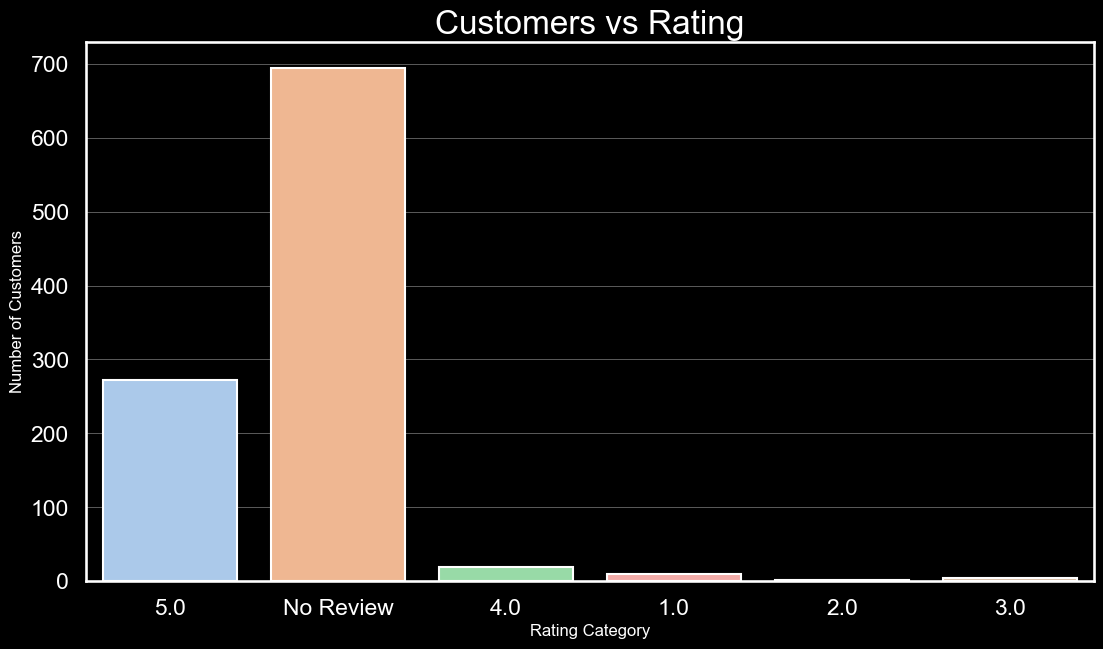

In [64]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='rating', data=exp, palette="pastel")
ax.set_xlabel( "Rating Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs Rating" , size = 24 )

In [65]:
new_rating = []
for row in exp['rating']:
    
    if row == 'No Review':
        new_rating.append('No Review')
    elif row < 5.0:
        new_rating.append('Others')
    else:
        new_rating.append(5.0)
        
exp['unbalanced_rating'] = new_rating

In [66]:
exp.unbalanced_rating.value_counts()

No Review    695
5.0          272
Others        34
Name: unbalanced_rating, dtype: int64

Text(0.5, 1.0, 'Customers vs Rating Classification')

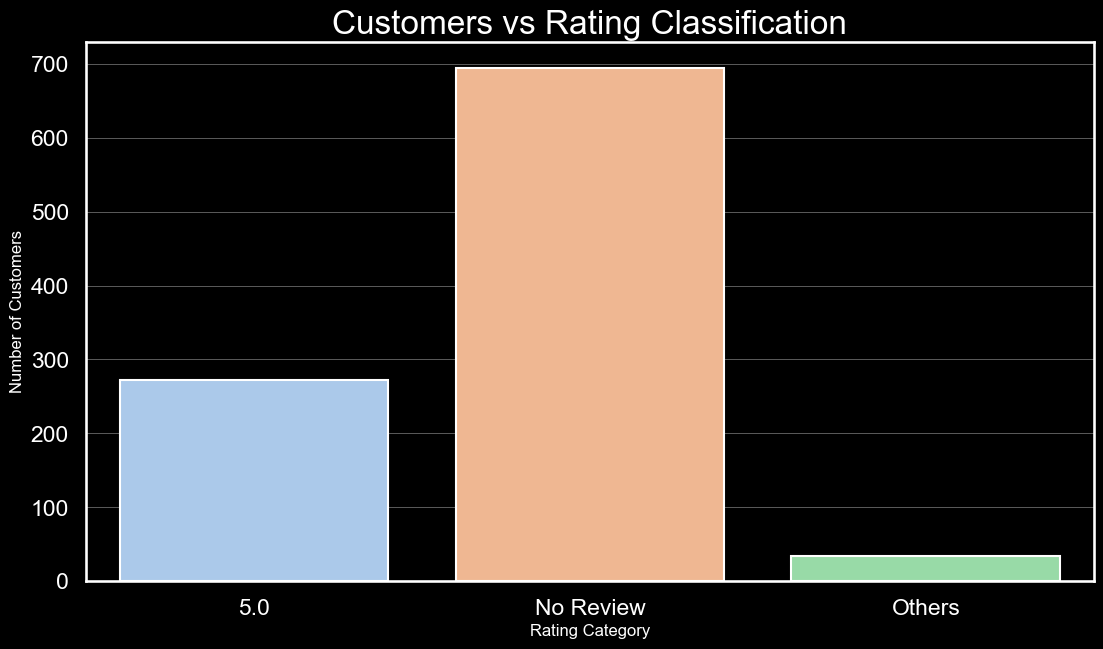

In [67]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='unbalanced_rating', data=exp, palette="pastel")
ax.set_xlabel( "Rating Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs Rating Classification" , size = 24 )

In [68]:
nps_rating = []
for row in exp2['rating']:
    if (row >= 4.0):
        nps_rating.append('Promoters')
    elif (row >= 3.0):
        nps_rating.append('Passive')
    else:
        nps_rating.append('Detractors')
exp2['nps_rating'] = nps_rating

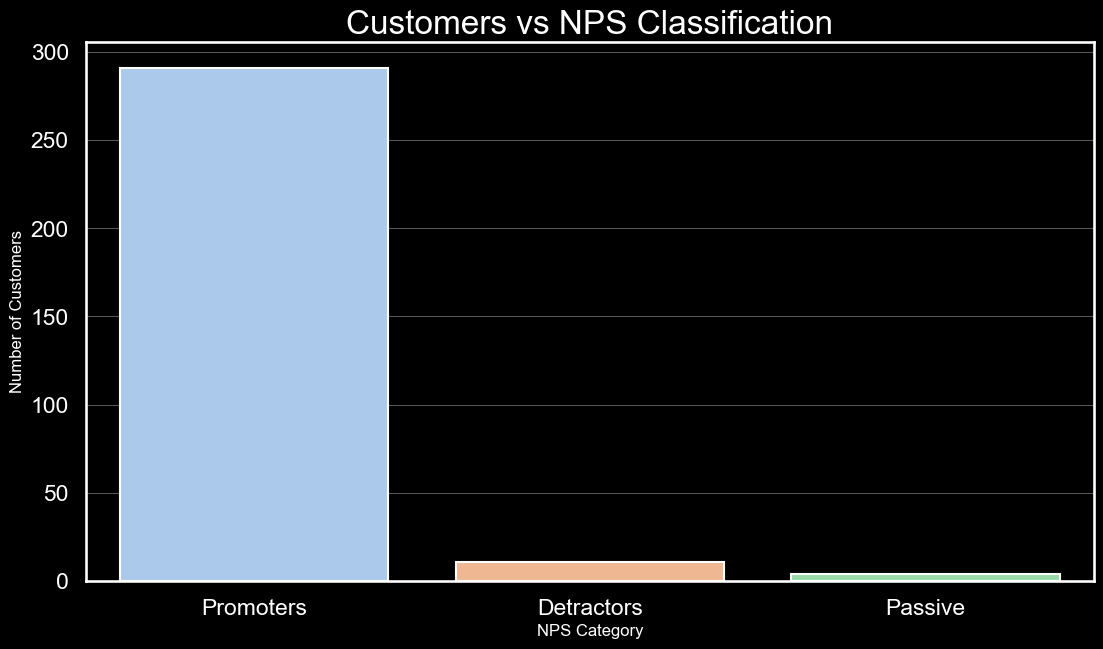

In [69]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='nps_rating', data=exp2, palette="pastel")
ax.set_xlabel( "NPS Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs NPS Classification" , size = 24 )
plt.show()


In [70]:
inner_df.isna().sum()

id                0
rating        45923
start_time        0
end_time          0
speaker           0
comment           0
dtype: int64

In [71]:
agg_funcs = {'rating' : 'first',
            'comment' : 'size', 
            'end_time': 'last' }

In [72]:
relation_rating_comment = inner_df.groupby('id').agg(agg_funcs).reset_index().rename(columns={'comment': 'number_comments', 'end_time': 'minutes'})
relation_rating_comment.minutes = pd.to_datetime(relation_rating_comment.minutes, format='%H:%M:%S').dt.minute

In [73]:
relation_rating_comment.isna().sum()

id                   0
rating             683
number_comments      0
minutes              0
dtype: int64

In [74]:
relation_rating_comment.rating.fillna('No Review', inplace=True)

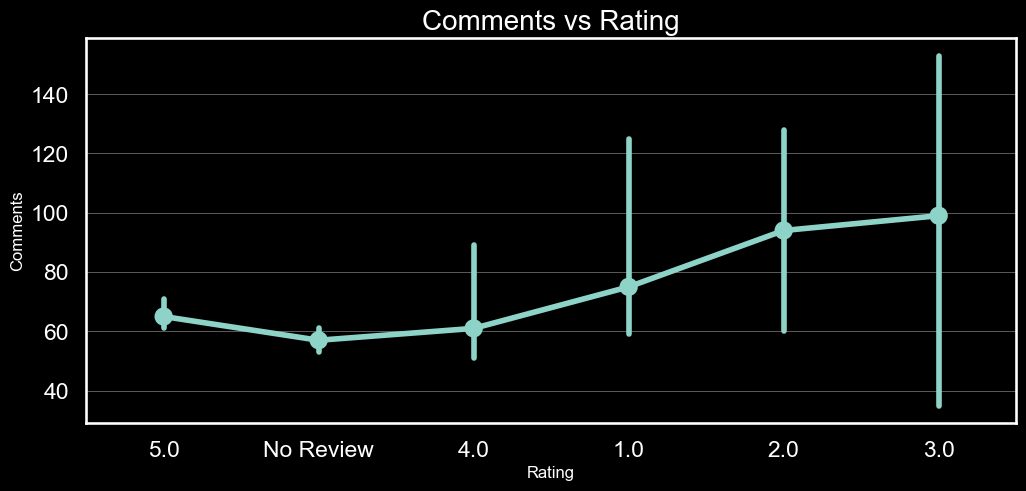

In [75]:
fig, ax = plt.subplots(figsize = (12,5))
sns.pointplot(data=relation_rating_comment, x='rating', y='number_comments', estimator='median')
ax.set_ylabel( "Comments" , size = 12)
ax.set_xlabel( "Rating" , size = 12)
ax.set_title( "Comments vs Rating" , size = 20 )
plt.show()

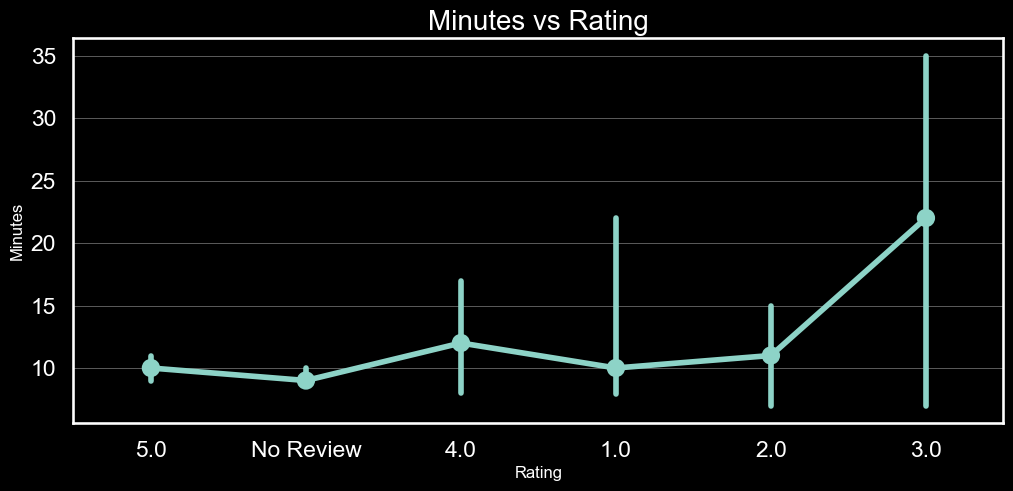

In [76]:
fig, ax = plt.subplots(figsize = (12,5))
sns.pointplot(data=relation_rating_comment, x='rating', y='minutes', estimator='median')
ax.set_ylabel( "Minutes" , size = 12)
ax.set_xlabel( "Rating" , size = 12)
ax.set_title( "Minutes vs Rating" , size = 20 )
plt.show()

In [77]:
inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b']

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
80,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:58,0:10:58,ch_1,"Então, tá, Se tu puder aguardar pra avaliar o ..."
81,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:03,0:11:04,ch_0,tá jóia Brigada
82,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:04,0:11:05,ch_1,Obrigada. Tchau. Tchau
83,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:06,0:11:07,ch_0,Tchau


## NLP Analysis

In [78]:
import nltk
#nltk.download('stopwords')
from collections import Counter
import re
from nltk import ngrams

In [79]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [80]:
extra_list = ['t','pra','a','aqui','ento', 'no', 'eu', 'carto', 'n']
stopwords.append(extra_list)

In [153]:
import re
def clean_text(data, column):
    data[column] = data[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])\
        .lower().encode('ascii', errors='ignore').decode('utf-8')).replace('t ', 'ta ')
    data[column] = data[column].apply(lambda x: re.sub('\W+',' ', x)) 
    return data

In [82]:
def return_most_common(df, n_words, column, n_gram):
    all_text = [' '.join(df[column])]
    output_words = all_text[0].split()
    ctr = Counter(ngrams(output_words, n_gram))
    most_occur = ctr.most_common(n_words)
    return most_occur

98% of our conversation_id has actual data of comments and time 

In [83]:
len(inner_df.id.unique())/len(df)

0.987012987012987

Here we have all ratings with minutes of call and all customer comments in a string

In [84]:
sentiment_df = inner_df.query("speaker == 'ch_0'").drop(columns=['start_time']).rename(columns={'end_time' : 'duration'})
g = sentiment_df.groupby('id')
sentiment_df.duration = (g['duration'].transform('last'))
sentiment_df['minutes'] = pd.to_datetime(sentiment_df.duration, format='%H:%M:%S').dt.minute
sentiment_df.drop(columns=['duration'], inplace=True)

sentiment_df = sentiment_df.groupby('id').tail(10)

sentiment_df = sentiment_df.groupby('id').agg({'rating' : 'first',
                                'speaker': 'first',
                                'comment': ' '.join,
                                 'minutes': 'first' }).reset_index()
sentiment_df = clean_text(sentiment_df, 'comment')


sentiment_df

,id,rating,speaker,comment,minutes
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,ch_0,senha ah sim u pode falar t u sim u ento t jia...,11
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,ch_0,sim t deixa perguntar outra coisa vai nmero c...,9
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,ch_0,diminui valor parcela okay agradecer a caso ac...,11
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,ch_0,queria saber detalhes caso fazer lance n cont...,4
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN,ch_0,isso crdito carto n que dinheiro meu u existe ...,11
...,...,...,...,...,...
973,3f327a25-e87d-4c61-9327-9aa9f35a6ce7,4.0,ch_0,voc telefone isso t okay nome t jia eu fico ag...,16
974,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN,ch_0,resumindo consegue fazer nada bloqueei meu car...,48
975,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN,ch_0,ah t obrigado hum faz assim pode conta poupana...,18
976,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN,ch_0,acha vou vou pra l mobi porque servio l lavour...,15


<AxesSubplot: >

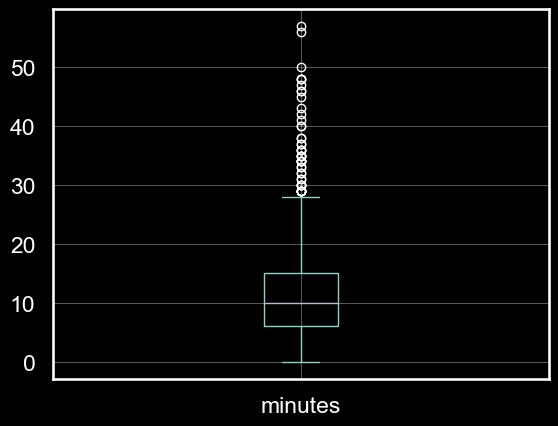

In [85]:
sentiment_df.minutes.plot(kind='box')

Sorting our dataset by comment len

In [86]:
sentiment_df['len'] = sentiment_df['comment'].str.len() 
sentiment_df = sentiment_df.sort_values(['len'], ascending=True)
sentiment_df = sentiment_df.query("len > 5").query("minutes >= 1")
sentiment_df.head(3)

,id,rating,speaker,comment,minutes,len
650,36a651ee-cd6d-49cf-a849-7eb661e3d8a2,NaN,ch_0,al al al,6,9
248,2ca33a2a-ab95-469b-b0c7-139564891653,NaN,ch_0,t entendeu,1,11
306,2e63c84f-6c1f-4a15-a2b2-4a0aa2cfab4c,NaN,ch_0,ai desgraa,2,12


Checking for Gramatical Errors

In [87]:
sentiment_df.comment.sample(5)

592    deixa ver minutinho ah sim t certo t bom obrig...
57     t u tudo bem descontado sexta conta no dia rea...
629    ah okay ento ah t bom no isso ento protocolo a...
611    hum u sim u entendi t vi aqui bom vou verifica...
306                                          ai desgraa 
Name: comment, dtype: object

Tokenization

In [88]:
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess

sentiment_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in sentiment_df['comment']] 

In [89]:
sentiment_df

,id,rating,speaker,comment,minutes,len,tokenized_text
650,36a651ee-cd6d-49cf-a849-7eb661e3d8a2,NaN,ch_0,al al al,6,9,"[al, al, al]"
248,2ca33a2a-ab95-469b-b0c7-139564891653,NaN,ch_0,t entendeu,1,11,[entendeu]
306,2e63c84f-6c1f-4a15-a2b2-4a0aa2cfab4c,NaN,ch_0,ai desgraa,2,12,"[ai, desgraa]"
927,3e0230ea-a9d8-4a57-a2aa-993753943927,NaN,ch_0,boa noite boa noite,2,20,"[boa, noite, boa, noite]"
322,2ea8ad9e-1dac-4d89-a17a-4f2c90b20a22,NaN,ch_0,foi t certo certo pode,4,23,"[foi, certo, certo, pode]"
...,...,...,...,...,...,...,...
430,314cdcdc-ab58-4e5e-a307-71ff78e383dd,5.0,ch_0,pois t vendo t dando t dando t dando exatament...,22,1638,"[pois, vendo, dando, dando, dando, exatamente,..."
229,2c22d9b8-751d-472b-a48a-7dba4944da5c,NaN,ch_0,t entendendo ver alterar horrio entendendo a b...,11,1646,"[entendendo, ver, alterar, horrio, entendendo,..."
79,282f055d-33b3-4aa8-a213-17f71e5dd564,NaN,ch_0,entendeu s assim vanice esperaria prxima respo...,48,1766,"[entendeu, assim, vanice, esperaria, prxima, r..."
614,35c1650e-eaa5-4c62-a9f3-ae5d653f5a66,NaN,ch_0,eu quero ter tem ter nmero sorteio eu conferir...,13,1924,"[eu, quero, ter, tem, ter, nmero, sorteio, eu,..."


### Using BOW

In [154]:
clean_df = clean_text(inner_df, column='comment')

In [155]:
return_most_common(clean_df.query('rating >= 5'), 10, 'comment', 3)

[(('tempo', 'espera', 'estimado'), 281),
 (('fazemos', 'juntos', 'desde'), 277),
 (('juntos', 'desde', 'incio'), 277),
 (('desde', 'incio', 'tempos'), 277),
 (('incio', 'tempos', 'fazemos'), 275),
 (('tempos', 'fazemos', 'juntos'), 274),
 (('fazemos', 'juntos', 'amizade'), 271),
 (('juntos', 'amizade', 'amor'), 271),
 (('amizade', 'amor', 'tradio'), 271),
 (('amor', 'tradio', 'ideal'), 269)]

In [156]:
return_most_common(clean_df.query('rating <= 3'), 10, 'comment', 3)

[(('pessoa', 'fsica', 'jurdica'), 15),
 (('chamada', 'encaminhada', 'atendentes'), 15),
 (('encaminhada', 'atendentes', 'favor'), 15),
 (('atendentes', 'favor', 'aguarde'), 15),
 (('fsica', 'jurdica', 'informe'), 14),
 (('jurdica', 'informe', 'nmero'), 13),
 (('vamos', 'l', 'experincia'), 13),
 (('ol', 'hotel', 'inteligncia'), 12),
 (('hotel', 'inteligncia', 'artificial'), 12),
 (('bom', 'ter', 'gente'), 12)]

In [157]:
clean_df.rating.value_counts(normalize=True)

5.0    0.884617
4.0    0.058195
1.0    0.032053
3.0    0.016902
2.0    0.008232
Name: rating, dtype: float64

In [158]:
sent = clean_df[~clean_df.rating.isna()].query("speaker == 'ch_0'").groupby('id').tail(10).groupby('id').head(3).groupby('id').agg({'rating' : 'first',
                                'speaker': 'first',
                                'comment': ' '.join}).reset_index()

sent['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in sent['comment']] 
sent.head(5)

,id,rating,speaker,comment,tokenized_text
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,ch_0,senha ah sim u,"[senha, ah, sim]"
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,ch_0,sim t deixa perguntar outra coisa vai nmero c...,"[sim, deixa, perguntar, outra, coisa, vai, nme..."
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,ch_0,diminui valor parcela,"[diminui, valor, parcela]"
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,ch_0,queria saber detalhes caso fazer lance n cont...,"[queria, saber, detalhes, caso, fazer, lance, ..."
4,26711b60-a685-4abc-a7ff-aad89cba5bbe,5.0,ch_0,alberto boa noite t contrato emprstimo pra ass...,"[alberto, boa, noite, contrato, emprstimo, pra..."


Corrigindo palavras

Demonstração Hunspell

In [159]:
from hunspell import Hunspell

h = Hunspell('Portuguese (Brazilian)', hunspell_data_dir=r'data\dict')

In [160]:
word = 'emprstimo'
print(h.suggest(word))

('empréstimo', 'impersistimo', 'prestimoso')


In [161]:
def correct_word(word):
    if(h.spell(word)):
        return word
    else:
        return h.suggest(word)[0]

In [162]:
def correct_sentence(sentence):
    sentence_split = sentence.split()
    output = list(map(correct_word, sentence_split ))
    sentence_OUTPUT =' '.join(word for word in output)
    return sentence_OUTPUT

Aplicação no Dataset

In [163]:
sent['clean_comment'] = sent.tokenized_text.apply(lambda x: ' '.join(word for word in x))

In [164]:
sent.tokenized_text

0                                       [senha, ah, sim]
1      [sim, deixa, perguntar, outra, coisa, vai, nme...
2                              [diminui, valor, parcela]
3      [queria, saber, detalhes, caso, fazer, lance, ...
4      [alberto, boa, noite, contrato, emprstimo, pra...
                             ...                        
300    [silva, cordeiro, alexandre, silva, poder, ano...
301    [reais, ah, coop, ontem, perodo, manh, horas, ...
302                              [sim, boa, tarde, fala]
303                          [voc, telefone, okay, nome]
304    [manivela, quinta, eh, pode, meio, horrio, mei...
Name: tokenized_text, Length: 305, dtype: object

In [165]:
sent['clean_comment']

0                                           senha ah sim
1        sim deixa perguntar outra coisa vai nmero conta
2                                  diminui valor parcela
3      queria saber detalhes caso fazer lance contemp...
4      alberto boa noite contrato emprstimo pra assin...
                             ...                        
300    silva cordeiro alexandre silva poder anos nmer...
301           reais ah coop ontem perodo manh horas acho
302                                   sim boa tarde fala
303                               voc telefone okay nome
304    manivela quinta eh pode meio horrio meio dia h...
Name: clean_comment, Length: 305, dtype: object

In [166]:
sent['clean_comment'] = sent['clean_comment'].apply(lambda x: correct_sentence(x))

In [167]:
sent[['comment', 'clean_comment']].sample(20)

,comment,clean_comment
257,contrrio,contrario
139,ah protocolo antes nmero,ah protocolo antes nm ero
231,ah t pequeno aparece comandar instruo,ah pequeno aparece comandar instruo
23,meses,meses
266,u t t okay ah entendi,okay ah entendi
20,t okay sim sim sim sim t perfeito sim t vou en...,okay sim sim sim sim perfeito sim vou entrar c...
216,acho aproximao passaram tempo quanto cento pri...,acho aproximativo passaram tempo quanto cento ...
235,agora julho ah certo t ento ento pra entender ...,agora julho ah certo neto neto pra entender ne...
158,conta fiz muita conta conta conjunta poupana i...,conta fiz muita conta conta conjunta popana im...
3,queria saber detalhes caso fazer lance n cont...,queria saber detalhes caso fazer lance contemp...


Data Augmentation

Choosing Sets

In [168]:
comments = sent.clean_comment.values
classes = sent.rating.values
classes

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5.,
       5., 4., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 1., 5., 5., 5., 5.,
       5., 5., 4., 5., 2., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 3., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 4., 5., 2., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5., 5., 1., 5., 5.,
       5., 4., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 4., 5., 4., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 1.

**Vectorizer**

Bow

In [169]:
vectorizer = CountVectorizer(ngram_range=(1,1))
freq_rating = vectorizer.fit_transform(comments)

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    sublinear_tf= True,
    lowercase=True,
    norm= False, 
    ngram_range= (1,1),
    use_idf=False,
    binary=True,
    smooth_idf=False
)

freq_rating = tfidf.fit_transform(comments)

Sets

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(comments, classes, test_size=0.1, random_state=42)

Model

In [171]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(freq_rating, classes)

c:\Users\victo\anaconda3\envs\dev\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\victo\anaconda3\envs\dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [172]:
tests = ["vou na agncia resolver com o gerente na sexta",
          "Muito obrigado por resolver meu problema, amei seu atendimento",
          "OK, fico no aguardo"]

vect_test = vectorizer.transform(tests)
tests_predict = model.predict(vect_test)
tests_predict

array([5., 5., 5.])

Métricas

In [173]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [174]:
predict = model.predict(vectorizer.transform(X_test))
print('F1-Score: ', f1_score(predict, y_test, average='macro'))
print('Precision: ', precision_score(predict, y_test, average='macro'))
print('Recall: ', recall_score(predict, y_test, average='macro'))

F1-Score:  1.0
Precision:  1.0
Recall:  1.0


We have here more than 60k lines of textual content from 2 speakers per ID 

***ch_1 = bot or attendant***

***ch_2 = customer***

In [ ]:
inner_df_2 = inner_df.copy()

In [ ]:
inner_df.sample(3)

,id,rating,start_time,end_time,speaker,comment
13586,2b0bf061-84a1-400b-a861-ae301e3d7791,NaN,0:03:32,0:03:32,ch_1,porque ele
26200,2fc7afa9-2b3d-4401-bce9-e8d327b2753d,5.0,0:05:47,0:05:47,ch_1,nada obrigado ter aguardado t vai seguir atend...
68027,3f197860-e551-4b93-a044-e8318d387242,NaN,0:22:23,0:22:24,ch_0,assim ele vai passar pra ligao


In [ ]:
inner_df_2.sample(3)

,id,rating,start_time,end_time,speaker,comment
66344,3e8f0dcf-4e95-4149-ac7a-27b71deab2cf,5.0,0:13:27,0:13:27,ch_1,voc lembra dessa compra
4769,27f93d9e-307b-45aa-bf3d-3499e4903de5,5.0,0:01:15,0:01:15,ch_1,t eu posso fazer isso ento entro contato agnci...
7731,28e8b791-1196-4168-9d03-b31b0380bd56,NaN,0:03:00,0:03:01,ch_0,contra


In [ ]:
inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b'][inner_df.speaker == 'ch_0'].tail(5)

C:\Users\victo\AppData\Local\Temp\ipykernel_26896\3622667897.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b'][inner_df.speaker == 'ch_0'].tail(5)


,id,rating,start_time,end_time,speaker,comment
75,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:28,0:10:29,ch_0,t
77,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:37,0:10:38,ch_0,u sim u ento t jia
79,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:56,0:10:57,ch_0,
81,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:03,0:11:04,ch_0,t jia brigada
83,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:06,0:11:07,ch_0,tchau
